## Лабораторная работа 3

In [1]:
!pip install roboflow
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 116.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.9 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow
from ultralytics import YOLO
import os
from google.colab import files
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
rf = Roboflow(api_key="6UpHAoUm5HOjZtvm6ceP")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-11 in yolov11:: 100%|██████████| 20262/20262 [00:02<00:00, 7080.37it/s]


In [4]:
model = YOLO("yolo11s.pt")

In [6]:
device = 0 if torch.cuda.is_available() else "cpu"

model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=15,
    imgsz=640,
    batch=16,
    device=device,
)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b071e16e5a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

loading Roboflow workspace...
loading Roboflow project...

🔍 Начинается валидация...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1068.3±325.5 MB/s, size: 19.8 KB)
val: Scanning /content/License-Plate-Recognition-11/valid/labels.cache... 2048 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2048/2048 3.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 128/128 5.8it/s 22.1s
                   all       2048       2195      0.978      0.943      0.973      0.697
Speed: 0.8ms preprocess, 6.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/runs/detect/val

✅ Результаты валидации:
Precision: 0.9778
Recall:    0.9434
mAP50:     0.9726
mAP50-95:  0.6973

📈 Доступные столбцы в логах: ['epoch', 'time', 'train/box_loss', 'tr

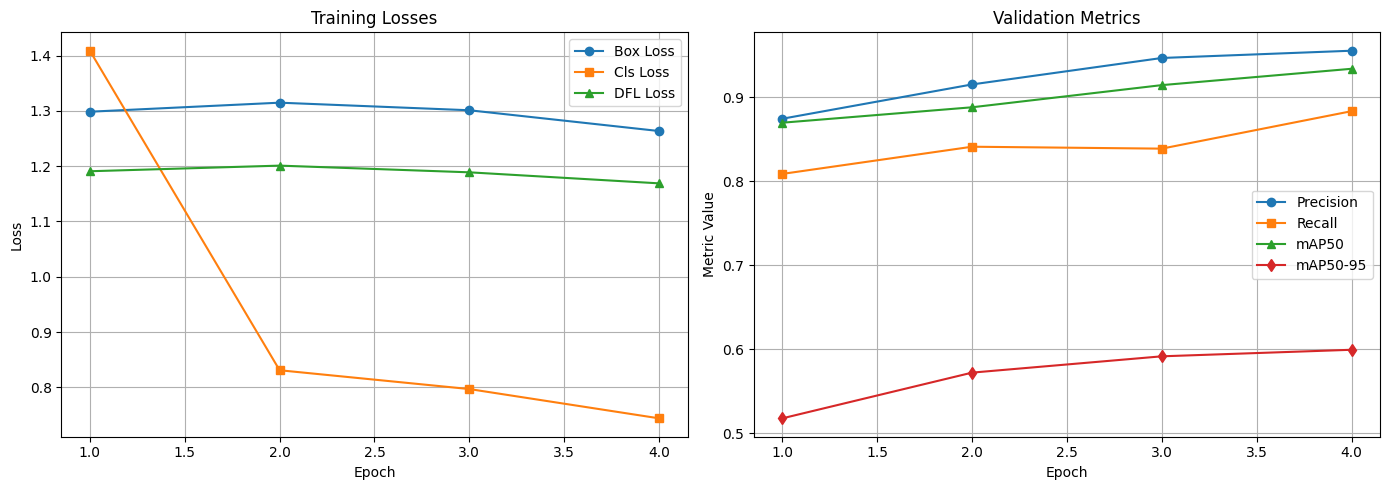

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 5%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 6%)
  adding: content/runs/detect/train/labels.jpg (deflated 38%)
  adding: content/runs/detect/train/results.csv (deflated 53%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 30%)
  adding: content/runs/detect/train/weights/last.pt (deflated 30%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 6%)
  adding: content/runs/detect/train/args.yaml (deflated 52%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:

!pip install -q ultralytics roboflow


from roboflow import Roboflow
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import pandas as pd


metrics = model.val()


print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall:    {metrics.box.mr:.4f}")
print(f"mAP50:     {metrics.box.map50:.4f}")
print(f"mAP50-95:  {metrics.box.map:.4f}")

csv_path = "/content/runs/detect/train/results.csv"
df = pd.read_csv(csv_path)



df.columns = df.columns.str.strip()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df.get('train/box_loss', df.get('box_loss', [])), label='Box Loss', marker='o')
plt.plot(df['epoch'], df.get('train/cls_loss', df.get('cls_loss', [])), label='Cls Loss', marker='s')
plt.plot(df['epoch'], df.get('train/dfl_loss', df.get('dfl_loss', [])), label='DFL Loss', marker='^')
plt.title("Training Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df.get('metrics/precision(B)', df.get('precision', [])), label='Precision', marker='o')
plt.plot(df['epoch'], df.get('metrics/recall(B)', df.get('recall', [])), label='Recall', marker='s')
plt.plot(df['epoch'], df.get('metrics/mAP50(B)', df.get('mAP50', [])), label='mAP50', marker='^')
plt.plot(df['epoch'], df.get('metrics/mAP50-95(B)', df.get('mAP50-95', [])), label='mAP50-95', marker='d')
plt.title("Validation Metrics")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


!zip -r training_results.zip /content/runs/detect/train/


from google.colab import files
files.download("/content/runs/detect/train/weights/best.pt")
files.download("/content/training_results.zip")

In [ ]:
!zip -r videos.zip /content/runs/detect/

Saving номер машины 2.jpg to номер машины 2 (1).jpg

image 1/1 /content/номер машины 2 (1).jpg: 448x640 1 License_Plate, 12.2ms
Speed: 3.1ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


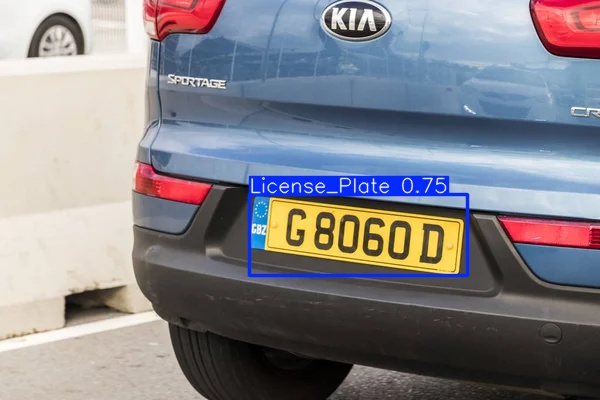

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
from google.colab import files
from ultralytics import YOLO
import os

uploaded = files.upload()


if not uploaded:
    raise ValueError("Файл не был загружен! Попробуйте снова.")


image_path = list(uploaded.keys())[0]



results = model.predict(
    source=image_path,
    conf=0.25,
    save=True
)

from IPython.display import Image, display
import os
result_image_path = os.path.join(results[0].save_dir, image_path)
display(Image(filename=str(result_image_path)))


files.download(str(result_image_path))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Лабораторная работа 4

In [11]:

!pip install -q ultralytics


from ultralytics import YOLO
import yaml
from pathlib import Path


from google.colab import files
import os


print(" Запуск трекинга с BoT-SORT")
model.track(
    source="/content/пробка.mp4",
    tracker="botsort.yaml",
    conf=0.25,
    iou=0.5,
    save=True,
    name="track_botsort_default"
)

print("🚀 Запуск трекинга с ByteTrack")
model.track(
    source="/content/пробка.mp4",
    tracker="bytetrack.yaml",
    conf=0.25,
    iou=0.5,
    save=True,
    name="track_bytetrack_default"
)


from ultralytics.utils import ROOT
import shutil

# Делаем кастомный конфиг
botsort_path = ROOT / 'cfg' / 'trackers' / 'botsort.yaml'
custom_botsort = "/content/botsort_high_thresh.yaml"

shutil.copy(botsort_path, custom_botsort)


with open(custom_botsort) as f:
    cfg = yaml.safe_load(f)

cfg['track_high_thresh'] = 0.6
cfg['match_thresh'] = 0.7
cfg['track_buffer'] = 60

with open(custom_botsort, 'w') as f:
    yaml.dump(cfg, f)



# Запуск с кастомным трекером
print("🚀 Запуск трекинга с кастомным BoT-SORT...")
model.track(
    source="/content/пробка.mp4",
    tracker=custom_botsort,
    conf=0.25,
    iou=0.5,
    save=True,
    name="track_botsort_custom"
)


!zip -r tracking_results.zip /content/runs/detect/track_*


print("Скачивание архива с результатами...")
files.download("tracking_results.zip")

Выходные данные были обрезаны до нескольких последних строк (5000).
video 1/1 (frame 2943/7933) /content/пробка.mp4: 384x640 1 License_Plate, 10.9ms
video 1/1 (frame 2944/7933) /content/пробка.mp4: 384x640 1 License_Plate, 16.1ms
video 1/1 (frame 2945/7933) /content/пробка.mp4: 384x640 1 License_Plate, 15.9ms
video 1/1 (frame 2946/7933) /content/пробка.mp4: 384x640 1 License_Plate, 11.7ms
video 1/1 (frame 2947/7933) /content/пробка.mp4: 384x640 1 License_Plate, 12.3ms
video 1/1 (frame 2948/7933) /content/пробка.mp4: 384x640 1 License_Plate, 13.5ms
video 1/1 (frame 2949/7933) /content/пробка.mp4: 384x640 1 License_Plate, 11.0ms
video 1/1 (frame 2950/7933) /content/пробка.mp4: 384x640 1 License_Plate, 11.5ms
video 1/1 (frame 2951/7933) /content/пробка.mp4: 384x640 1 License_Plate, 11.2ms
video 1/1 (frame 2952/7933) /content/пробка.mp4: 384x640 1 License_Plate, 11.1ms
video 1/1 (frame 2953/7933) /content/пробка.mp4: 384x640 1 License_Plate, 10.9ms
video 1/1 (frame 2954/7933) /content/проб

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>